In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import wrangle_mall

In [2]:
iris = sns.load_dataset('iris')

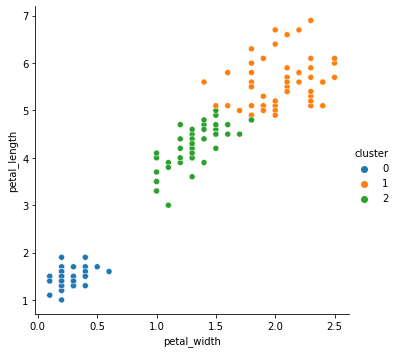

In [14]:
X = iris[['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
iris['cluster'] = kmeans.labels_
iris.cluster = iris.cluster.astype('category')

sns.relplot(data=iris, y='petal_length', x='petal_width', hue='cluster')

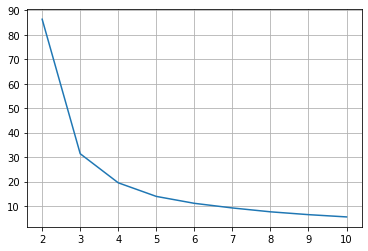

In [4]:
inertias = {k: KMeans(n_clusters=k).fit(X).inertia_ for k in range(2, 11)}
pd.Series(inertias).plot()
plt.grid()

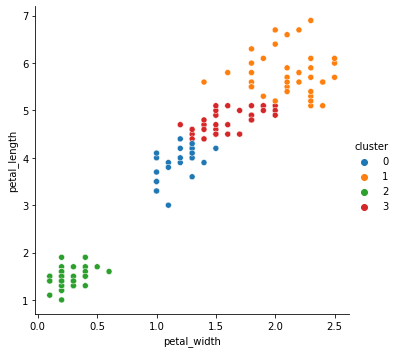

In [15]:
X = iris[['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
iris['cluster'] = kmeans.labels_
iris.cluster = iris.cluster.astype('category')

sns.relplot(data=iris, y='petal_length', x='petal_width', hue='cluster')

Text(0.5, 0.98, "clusters based on ['sepal_length', 'sepal_width']")

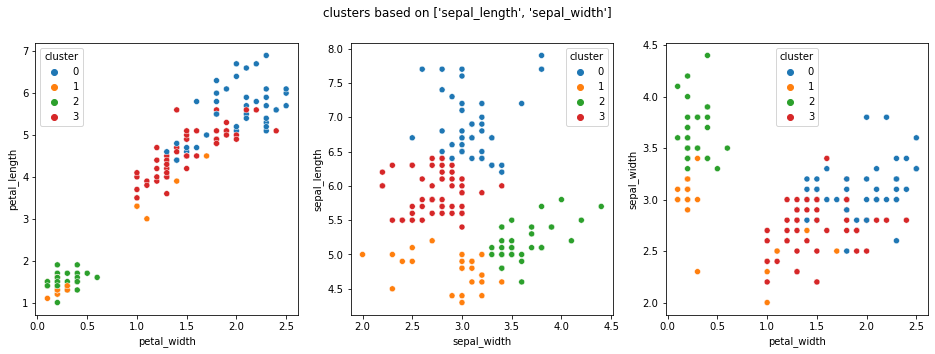

In [16]:
X = iris[['sepal_length', 'sepal_width']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
iris['cluster'] = kmeans.labels_
iris.cluster = iris.cluster.astype('category')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=iris, y='petal_length', x='petal_width', hue='cluster', ax=ax1)
sns.scatterplot(data=iris, y='sepal_length', x='sepal_width', hue='cluster', ax=ax2)
sns.scatterplot(data=iris, y='sepal_width', x='petal_width', hue='cluster', ax=ax3)
fig.suptitle(f'clusters based on {X.columns.tolist()}')

## Mall Customers

In [7]:
customers = wrangle_mall.acquire()
train, validate, test = wrangle_mall.split(customers)
train_scaled, _, _ = wrangle_mall.scale(train, validate, test)

Train: 136 rows, 5 cols
Validate: 34 rows, 5 cols
Test: 30 rows, 5 cols


In [8]:
X = train[['annual_income', 'spending_score']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.labels_
train.cluster = train.cluster.astype('category')

,age,annual_income,spending_score,is_female,count
0,47.500000,24.857143,18.000000,0.500000,14
1,32.173913,88.434783,79.565217,0.608696,23
2,40.909091,88.318182,18.000000,0.590909,22
3,24.764706,25.588235,79.529412,0.529412,17
4,42.483333,54.633333,49.466667,0.616667,60


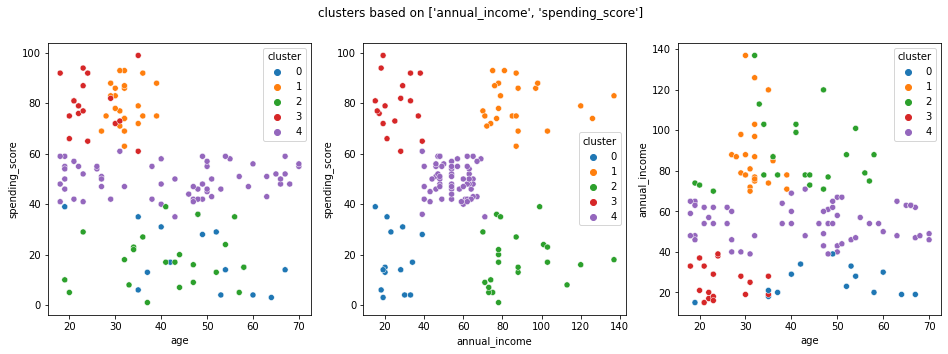

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=train, y='spending_score', x='age', hue='cluster', ax=ax1)
sns.scatterplot(data=train, y='spending_score', x='annual_income', hue='cluster', ax=ax2)
sns.scatterplot(data=train, y='annual_income', x='age', hue='cluster', ax=ax3)
fig.suptitle(f'clusters based on {X.columns.tolist()}')

means_by_cluster = (train
 .assign(is_female=train.gender == 'Female')
 .drop(columns=['gender', 'customer_id'])
 .groupby('cluster')
 .mean())
pd.concat([
    means_by_cluster,
    train.cluster.value_counts().sort_index().rename('count')
], axis=1)

Takeaways:

- most data points in cluster 4
- clusters 0, 2, and 4 tend be quite varied wrt age
- clusters 1 and 3, the high spenders, tend to be younger

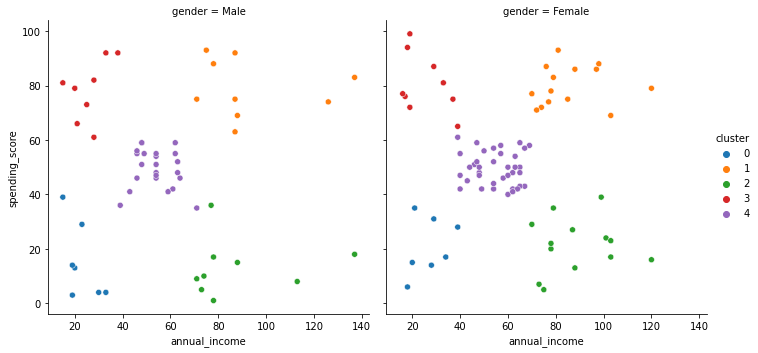

In [10]:
sns.relplot(data=train, hue='cluster', col='gender', y='spending_score', x='annual_income')

## Bonus: Scaling

In [17]:
url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/export?format=csv'
df = pd.read_csv(url)
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


<AxesSubplot:xlabel='x', ylabel='y'>

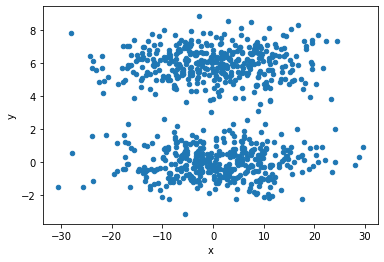

In [18]:
df.plot.scatter(y='y', x='x')

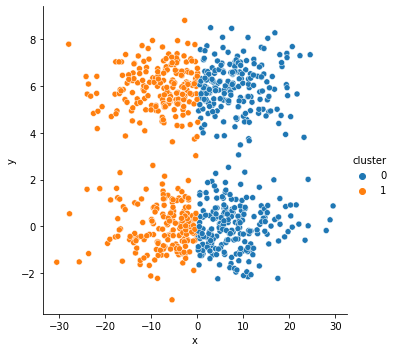

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['x', 'y']])
df['cluster'] = kmeans.labels_

sns.relplot(data=df, y='y', x='x', hue='cluster')

In [27]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

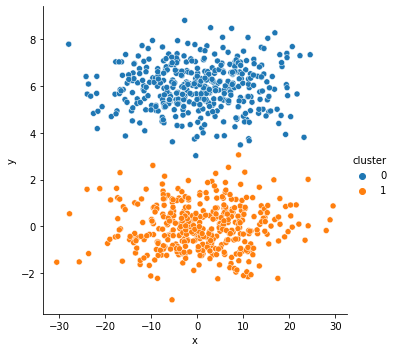

In [28]:
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[['x', 'y']] = scaler.fit_transform(df[['x', 'y']])

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled[['x', 'y']])
df['cluster'] = kmeans.labels_

sns.relplot(data=df, y='y', x='x', hue='cluster')

In [30]:
kmeans.cluster_centers_
kmeans.labels_
kmeans.inertia_

KMeans(n_clusters=2)